In this exercise you'll train a neural network on the Fuel Economy dataset and then explore the effect of the learning rate and batch size on SGD.

When you're ready, run this next cell to set everything up!

In [ ]:
!git clone https://github.com/Kaggle/learntools.git

fatal: destination path 'learntools' already exists and is not an empty directory.


In [ ]:
%cd learntools

/content/learntools/learntools


In [ ]:
!pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

<ipython-input-9-69b99e41148c>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In the Fuel Economy dataset your task is to predict the fuel economy of an automobile given features like its type of engine or the year it was made.

First load the dataset by running the cell below.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('https://raw.githubusercontent.com/raoulraft/Network-Intelligence-Course/main/fuel.csv')

fuel.head()
fuel.info()
fuel.describe()

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Take a look at the data if you like. Our target in this case is the 'FE' column and the remaining columns are the features.

In [ ]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Run the next cell to define the network we'll use for this task.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.

In [ ]:
model.compile(optimizer='adam',loss='mae')

Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is X with target y.

In [ ]:
history = model.fit(
    X, y,
    validation_data=(X, y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 1s 22ms/step - loss: 2.7015 - val_loss: 1.3861
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.8411 - val_loss: 0.7594
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.4861 - val_loss: 0.4624
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3318 - val_loss: 0.2611
Epoch 5/200
9/9 [==============================] - 0s 12ms/step - loss: 0.2145 - val_loss: 0.1780
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 0.1728 - val_loss: 0.1521
Epoch 7/200
9/9 [==============================] - 0s 10ms/step - loss: 0.1355 - val_loss: 0.1234
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1117 - val_loss: 0.1022
Epoch 9/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0982 - val_loss: 0.0910
Epoch 10/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0871 - val_loss: 0.0800
Epoch 11/200
9/9 [========

The last step is to look at the loss curves and evaluate the training. Run the cell below to get a plot of the training loss.

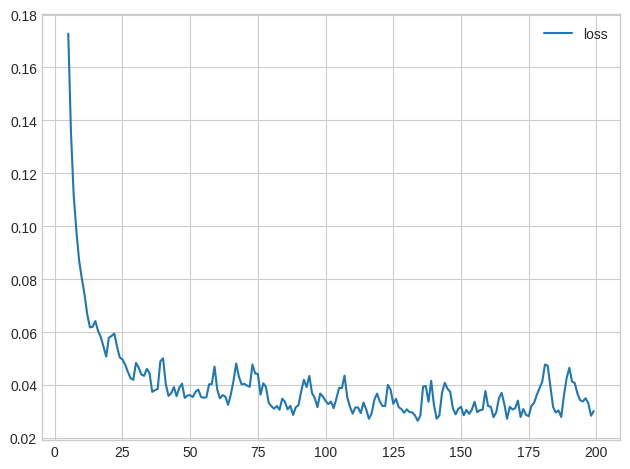

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

With the learning rate and the batch size, you have some control over:

How long it takes to train a model
How noisy the learning curves are
How small the loss becomes
To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.

The next cell will generate an animation like the one in the tutorial. Change the values for learning_rate, batch_size, and num_examples (how many data points) and then run the cell. (It may take a moment or two.) Try the following combinations, or try some of your own:

In [ ]:
learning_rate = 0.9
batch_size = 4096
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)

**Now try this with the red-wine dataset!** https://github.com/raoulraft/Network-Intelligence-Course/blob/main/red-wine.csv


